In [1]:
import pandas as pd

# assign variable to the historical data
file_path = '/home/int_junkie/Documents/Articles/DataVisuals/XAUUSD_H1_Data-V.csv'

data = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows and column names
print(data.head())
print(data.columns)

       <DATE>    <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
0  2020.01.27  01:00:00  1580.08  1588.77  1579.17  1582.95      15667      0   
1  2020.01.27  02:00:00  1583.07  1583.15  1577.38  1578.06      13088      0   
2  2020.01.27  03:00:00  1578.02  1581.88  1577.55  1580.82       7496      0   
3  2020.01.27  04:00:00  1580.84  1582.86  1580.60  1581.58       6490      0   
4  2020.01.27  05:00:00  1581.59  1581.60  1578.89  1579.00       5138      0   

   <SPREAD>  
0        63  
1        63  
2        63  
3        63  
4        63  
Index(['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>',
       '<VOL>', '<SPREAD>'],
      dtype='object')


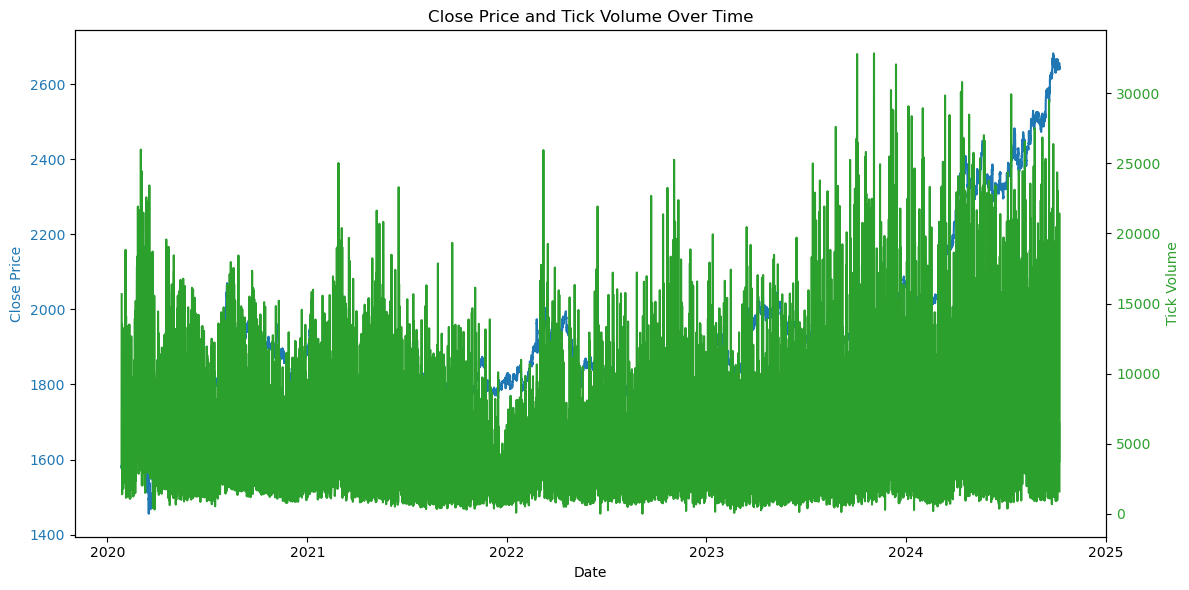

In [2]:
# Convert the <DATE> and <TIME> columns into a single datetime column
data['<DATETIME>'] = pd.to_datetime(data['<DATE>'] + ' ' + data['<TIME>'], format='%Y.%m.%d %H:%M:%S')

# Drop the original <DATE> and <TIME> columns
data = data.drop(columns=['<DATE>', '<TIME>'])

# Convert numeric columns from strings to appropriate float types
numeric_columns = ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>', '<VOL>', '<SPREAD>']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

# Set datetime as index for easier plotting
data.set_index('<DATETIME>', inplace=True)

# Let's plot the close price and tick volume to visualize the trend
import matplotlib.pyplot as plt

# Plot closing price and tick volume
fig, ax1 = plt.subplots(figsize=(12, 6))

# Close price on primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(data.index, data['<CLOSE>'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Tick volume on secondary y-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('Tick Volume', color='tab:green')  
ax2.plot(data.index, data['<TICKVOL>'], color='tab:green', label='Tick Volume')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Show the plot
plt.title('Close Price and Tick Volume Over Time')
fig.tight_layout()
plt.show()


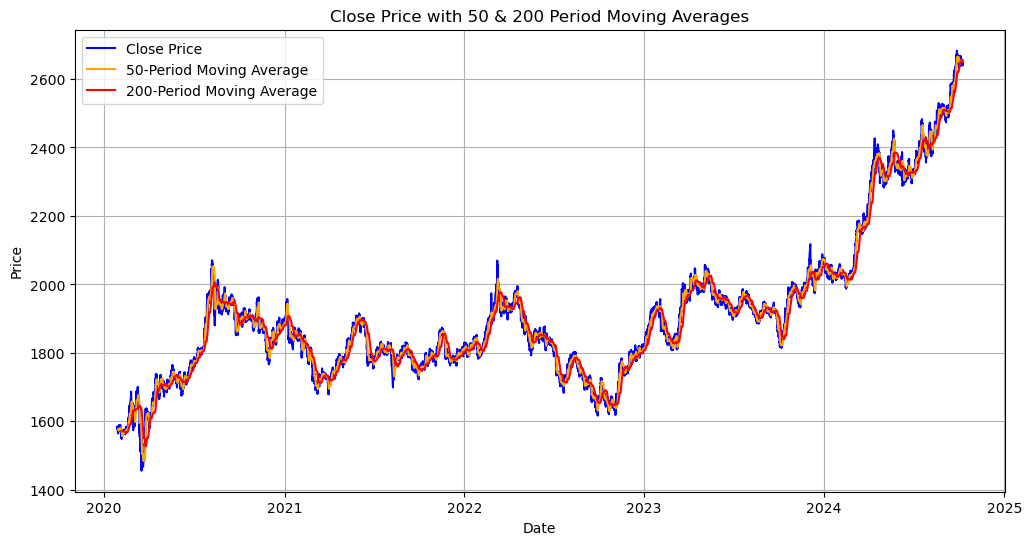

In [3]:
# Calculating moving averages: 50-period and 200-period for trend analysis
data['MA50'] = data['<CLOSE>'].rolling(window=50).mean()
data['MA200'] = data['<CLOSE>'].rolling(window=200).mean()

# Plot close price along with the moving averages
plt.figure(figsize=(12, 6))

# Plot close price
plt.plot(data.index, data['<CLOSE>'], label='Close Price', color='blue')

# Plot moving averages
plt.plot(data.index, data['MA50'], label='50-Period Moving Average', color='orange')
plt.plot(data.index, data['MA200'], label='200-Period Moving Average', color='red')

plt.title('Close Price with 50 & 200 Period Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()


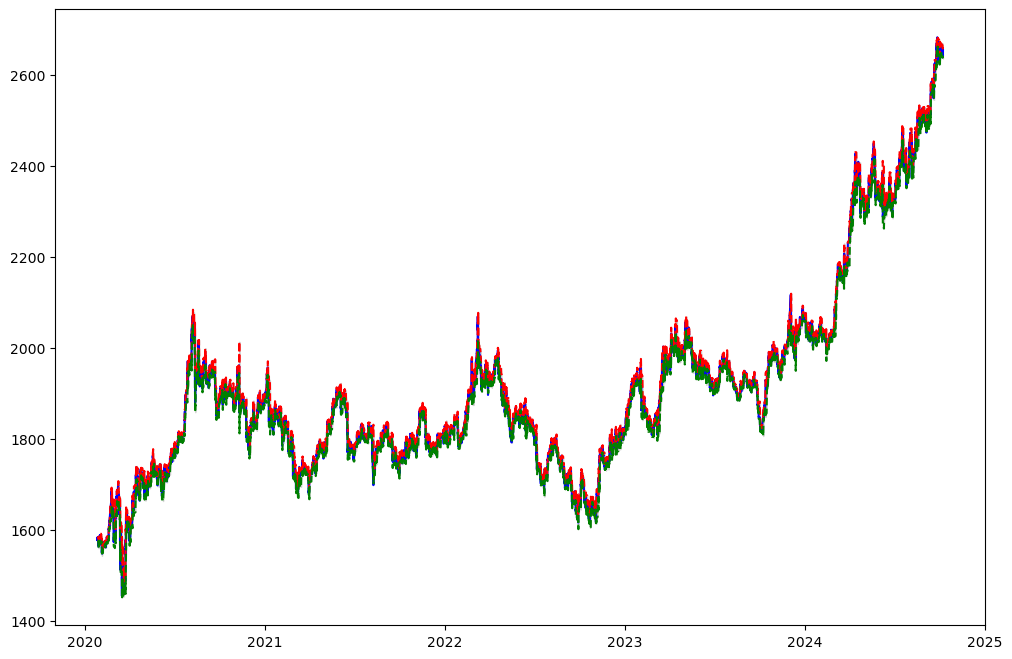

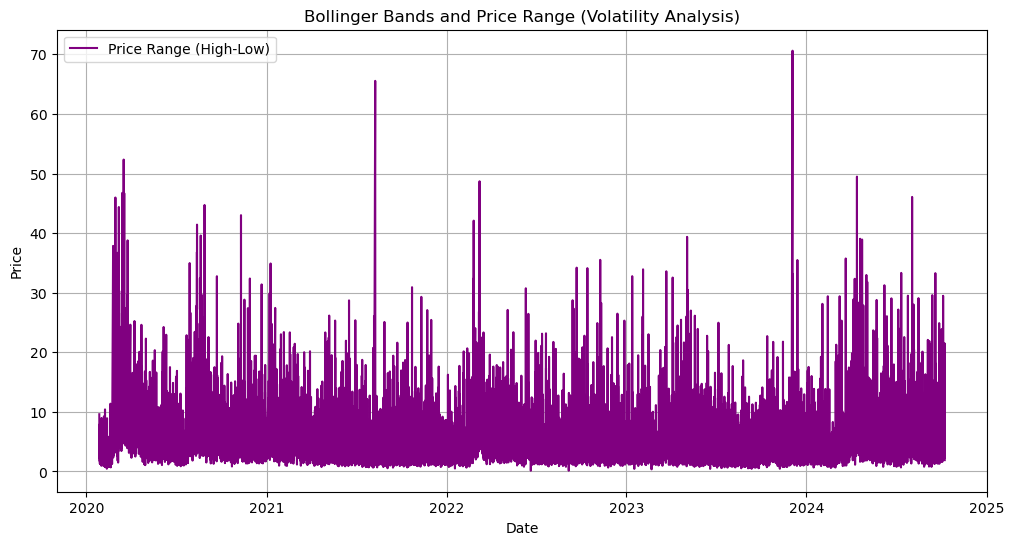

In [5]:
# Calculate the price range (High - Low)
data['Price_Range'] = data['<HIGH>'] - data['<LOW>']

# Calculate Bollinger Bands
# Use a 20-period moving average and 2 standard deviations
data['MA20'] = data['<CLOSE>'].rolling(window=20).mean()
data['BB_upper'] = data['MA20'] + 2 * data['<CLOSE>'].rolling(window=20).std()
data['BB_lower'] = data['MA20'] - 2 * data['<CLOSE>'].rolling(window=20).std()

# Plot the price range and Bollinger Bands along with the close price
plt.figure(figsize=(12, 8))

# Plot the close price
plt.plot(data.index, data['<CLOSE>'], label='Close Price', color='blue')

# Plot Bollinger Bands
plt.plot(data.index, data['BB_upper'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(data.index, data['BB_lower'], label='Lower Bollinger Band', color='green', linestyle='--')

# Fill the area between Bollinger Bands for better visualization
plt.fill_between(data.index, data['BB_upper'], data['BB_lower'], color='gray', alpha=0.3)

# Plot the price range on a separate axis
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price_Range'], label='Price Range (High-Low)', color='purple')

plt.title('Bollinger Bands and Price Range (Volatility Analysis)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [5]:
import pandas as pd
import talib
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env

# Verify the environment
check_env(env)

# Initialize and train the DQN model
model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

# Save the trained model
model.save("trading_dqn_model")

# Load and preprocess the data as before
data = pd.read_csv('XAUUSD_H1_Data-V.csv', delimiter='\t')
data['<DATETIME>'] = pd.to_datetime(data['<DATE>'] + ' ' + data['<TIME>'], format='%Y.%m.%d %H:%M:%S')
data = data.drop(columns=['<DATE>', '<TIME>'])
numeric_columns = ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>', '<VOL>', '<SPREAD>']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)
data.set_index('<DATETIME>', inplace=True)

# Calculate Bollinger Bands (20-period moving average with 2 standard deviations)
data['MA20'] = data['<CLOSE>'].rolling(window=20).mean()
data['BB_upper'] = data['MA20'] + 2 * data['<CLOSE>'].rolling(window=20).std()
data['BB_lower'] = data['MA20'] - 2 * data['<CLOSE>'].rolling(window=20).std()

# Calculate percentage price change and volume change as additional features
data['Pct_Change'] = data['<CLOSE>'].pct_change()
data['Volume_Change'] = data['<VOL>'].pct_change()

# Fill missing values
data.fillna(0, inplace=True)


In [6]:
import gym
from gym import spaces
import numpy as np

class TradingEnv(gym.Env):
    def __init__(self, data):
        super(TradingEnv, self).__init__()
        
        # Market data and feature columns
        self.data = data
        self.current_step = 0
        
        # Define action and observation space
        # Actions: 0 = Hold, 1 = Buy, 2 = Sell
        self.action_space = spaces.Discrete(3)
        
        # Observations (features: Bollinger Bands, Price Change, Volume Change)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)
        
        # Initial balance and positions
        self.balance = 10000  # Starting balance
        self.position = 0  # No position at the start (0 = no trade, 1 = buy, -1 = sell)
    
    def reset(self):
        self.current_step = 0
        self.balance = 10000
        self.position = 0
        return self._next_observation()
    
    def _next_observation(self):
        # Get the current market data (Bollinger Bands, Price Change, Volume Change)
        obs = np.array([
            self.data['BB_upper'].iloc[self.current_step],
            self.data['BB_lower'].iloc[self.current_step],
            self.data['Pct_Change'].iloc[self.current_step],
            self.data['Volume_Change'].iloc[self.current_step],
            self.position
        ])
        return obs
    
    def step(self, action):
        # Execute the trade based on action and update balance and position
        self.current_step += 1
        
        # Get current price
        current_price = self.data['<CLOSE>'].iloc[self.current_step]
        
        reward = 0  # Reward initialization
        done = self.current_step == len(self.data) - 1  # Check if we're done
        
        # Buy action
        if action == 1 and self.position == 0:
            self.position = 1
            self.entry_price = current_price
        
        # Sell action
        elif action == 2 and self.position == 1:
            reward = current_price - self.entry_price
            self.balance += reward
            self.position = 0
        
        # Hold action
        else:
            reward = 0
        
        return self._next_observation(), reward, done, {}
    
    def render(self, mode='human', close=False):
        # Optional: Print the current balance and position
        print(f"Step: {self.current_step}, Balance: {self.balance}, Position: {self.position}")

# Create the trading environment
env = TradingEnv(data)


In [10]:
from gym import spaces


In [18]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env

# Define the custom Trading Environment
class TradingEnv(gym.Env):
    def __init__(self, data):
        super(TradingEnv, self).__init__()
        
        # Market data and feature columns
        self.data = data
        self.current_step = 0
        
        # Define action and observation space
        # Actions: 0 = Hold, 1 = Buy, 2 = Sell
        self.action_space = spaces.Discrete(3)
        
        # Observations (features: Bollinger Bands, Price Change, Volume Change)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)
        
        # Initial balance and positions
        self.balance = 10000  # Starting balance
        self.position = 0  # No position at the start (0 = no trade, 1 = buy, -1 = sell)

    def reset(self, seed=None, options=None):
        # Initialize the random seed
        self.np_random, seed = self.seed(seed)
        
        self.current_step = 0
        self.balance = 10000
        self.position = 0
        
        # Return initial observation and an empty info dictionary
        return self._next_observation(), {}

    def _next_observation(self):
        # Get the current market data (Bollinger Bands, Price Change, Volume Change)
        obs = np.array([
            self.data['BB_upper'].iloc[self.current_step],
            self.data['BB_lower'].iloc[self.current_step],
            self.data['Pct_Change'].iloc[self.current_step],
            self.data['Volume_Change'].iloc[self.current_step],
            self.position
        ], dtype=np.float32)  # Explicitly cast to float32
        return obs
    
    def step(self, action):
        self.current_step += 1
        current_price = self.data['<CLOSE>'].iloc[self.current_step]
        
        reward = 0
        done = self.current_step == len(self.data) - 1
        truncated = False  # Set to False unless there's an external condition to end the episode early
        
        # Execute the action
        if action == 1 and self.position == 0:
            self.position = 1
            self.entry_price = current_price
        
        elif action == 2 and self.position == 1:
            reward = current_price - self.entry_price
            self.balance += reward
            self.position = 0
        
        # Return next observation, reward, terminated, truncated, and an empty info dict
        return self._next_observation(), reward, done, truncated, {}

    def render(self, mode='human', close=False):
        print(f"Step: {self.current_step}, Balance: {self.balance}, Position: {self.position}")
    
    def seed(self, seed=None):
        self.np_random, seed = gym.utils.seeding.np_random(seed)
        return self.np_random, seed

# Assuming your data is already prepared (as a DataFrame) and includes Bollinger Bands and other necessary features
# Create the environment
env = TradingEnv(data)

# Verify the environment
check_env(env)

# Train the model using DQN
model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

# Save the trained model
model.save("trading_dqn_model")



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [20]:
# Unpack the observation from the reset() method
obs, _ = env.reset()

# Loop through the environment steps
for step in range(len(data)):
    # Predict the action based on the observation
    action, _states = model.predict(obs)
    
    # Step the environment
    obs, rewards, done, truncated, info = env.step(action)
    
    # Render the environment (print the current state)
    env.render()

    # Check if the episode is done
    if done or truncated:
        print("Testing completed!")
        break



Step: 1, Balance: 10000, Position: 1
Step: 2, Balance: 10000, Position: 1
Step: 3, Balance: 10000, Position: 1
Step: 4, Balance: 10000, Position: 1
Step: 5, Balance: 10000, Position: 1
Step: 6, Balance: 10000, Position: 1
Step: 7, Balance: 10000, Position: 1
Step: 8, Balance: 10000, Position: 1
Step: 9, Balance: 10000, Position: 1
Step: 10, Balance: 10000, Position: 1
Step: 11, Balance: 10000, Position: 1
Step: 12, Balance: 10000, Position: 1
Step: 13, Balance: 10000, Position: 1
Step: 14, Balance: 10000, Position: 1
Step: 15, Balance: 10001.04, Position: 0
Step: 16, Balance: 10001.04, Position: 1
Step: 17, Balance: 10001.04, Position: 1
Step: 18, Balance: 10001.04, Position: 1
Step: 19, Balance: 10001.04, Position: 1
Step: 20, Balance: 9998.070000000002, Position: 0
Step: 21, Balance: 9998.070000000002, Position: 0
Step: 22, Balance: 9998.070000000002, Position: 0
Step: 23, Balance: 9998.070000000002, Position: 0
Step: 24, Balance: 9998.070000000002, Position: 0
Step: 25, Balance: 999

In [21]:
model.save("trading_dqn_model")


In [1]:
import socket
import numpy as np
from stable_baselines3 import DQN

# Load the trained model
model = DQN.load("trading_dqn_model")

# Set up the server
HOST = '127.0.0.1'  # Localhost (you can replace this with your IP)
PORT = 9999         # Port to listen on

# Create a TCP/IP socket
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_socket.bind((HOST, PORT))
server_socket.listen(1)

print(f"Server listening on {HOST}:{PORT}...")

while True:
    # Wait for a connection
    client_socket, client_address = server_socket.accept()
    print(f"Connection from {client_address}")
    
    # Receive data from MQL5 (price data sent by EA)
    data = client_socket.recv(1024).decode('utf-8')
    
    if data:
        print(f"Received data: {data}")
        
        # Convert received data to a numpy array
        observation = np.fromstring(data, sep=',')  # Assumes comma-separated price data

        # Make prediction using the model
        action, _ = model.predict(observation)
        
        # Send the predicted action back to MQL5
        client_socket.send(str(action).encode('utf-8'))
    
    # Close the client connection
    client_socket.close()


Server listening on 127.0.0.1:9999...


KeyboardInterrupt: 